## GMR（Gaussian Mixture Regression）

In [1]:
%load_ext lab_black

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from gmr import GMM, plot_error_ellipses
from gmr.utils import check_random_state

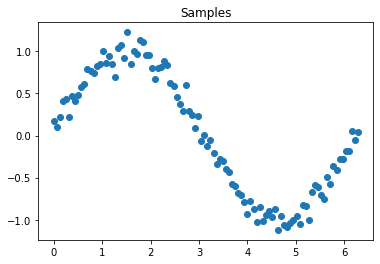

In [3]:
# Generate dataset
n_samples = 100
random_state = check_random_state(0)

X = np.ndarray((n_samples, 2))
X[:, 0] = np.linspace(0, 2 * np.pi, n_samples)
X[:, 1] = np.sin(X[:, 0]) + random_state.randn(n_samples) * 0.1

# Visualize
plt.scatter(X[:, 0], X[:, 1])
plt.title("Samples")
plt.show()

### GMM -モデル設計

In [4]:
gmm = GMM(n_components=3, random_state=0)
gmm.from_samples(X)

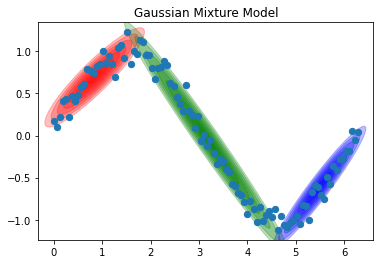

In [5]:
COLOR_LIST = ["r", "g", "b"]

ax = plt.gca()
plot_error_ellipses(ax, gmm, colors=COLOR_LIST)
plt.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
plt.title("Gaussian Mixture Model")
plt.show()

### 確率密度関数（ガウス分布）を等高線で可視化

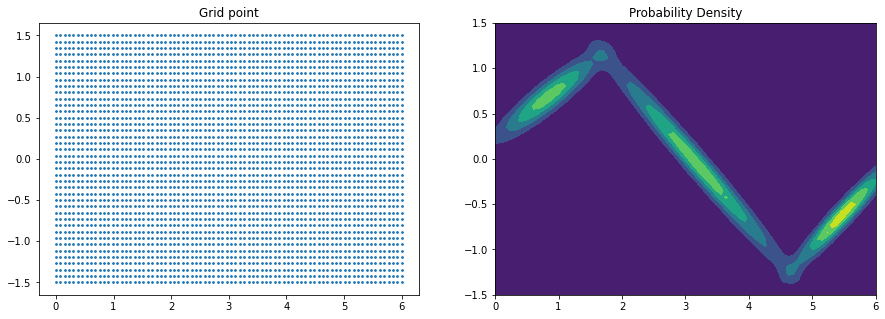

In [6]:
# Generate grid point (80 * 40 point)
x, y = np.meshgrid(np.linspace(0, 6, 80), np.linspace(-1.5, 1.5, 40))
Grid_point = np.vstack((x.ravel(), y.ravel())).T

# Compute probability density (Compute height for grid point)
p = gmm.to_probability_density(Grid_point)
p = p.reshape(*x.shape)

# Visualize grid point
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(Grid_point[:, 0], Grid_point[:, 1], s=3)
plt.title("Grid point")

# Visualize Probability Density
plt.subplot(1, 2, 2)
plt.contourf(x, y, p)
plt.title("Probability Density")
plt.show()

### 条件付き確率の算出と可視化

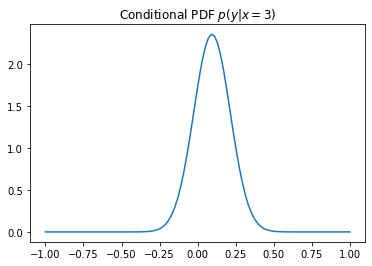

 ==== y_cond.means ==== 
[[ 1.81888686]
 [ 0.09459223]
 [-2.41541779]]


In [7]:
# Axis
x_axis, y_axis = np.array([0]), np.array([1])

# Test data
test_x, test_y = np.array([3.0]), np.array([-0.5])

# Compute conditional distribution over given indices.
y_cond = gmm.condition(x_axis, test_x)  # p(y | x = 3)
# x_cond = gmm.condition(y_axis, test_y)  # p(x | y = -0.5)

# Generate Grid point (x axis)
Grid_X = np.linspace(-1, 1, 100)

# Compute probability density (Compute height for grid point)
Y_cond = y_cond.to_probability_density(Grid_X[:, np.newaxis])

# Visualize Conditional PDF
plt.plot(Grid_X, Y_cond)
plt.title("Conditional PDF $p(y | x = 3)$")
plt.show()

# Output
print(" ==== y_cond.means ==== ")
print(y_cond.means)
# print(" ==== x_cond.means ==== ")
# print(x_cond.means)

### GMR -GMMを活用した回帰-

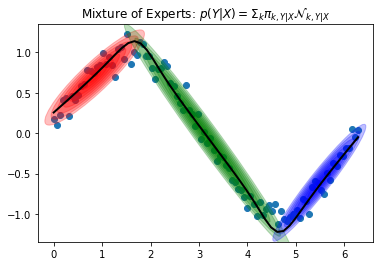

In [8]:
# Test data
X_test = np.linspace(0, 2 * np.pi, 50)

# Predict
Y = gmm.predict(np.array([0]), X_test[:, np.newaxis])

# Visualize GMR
plot_error_ellipses(plt.gca(), gmm, colors=COLOR_LIST)
plt.plot(X_test, Y.ravel(), c="k", lw=2)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Mixture of Experts: $p(Y | X) = \Sigma_k \pi_{k, Y|X} \mathcal{N}_{k, Y|X}$")
plt.show()